In [10]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [25]:
le_p10_df = pd.read_excel('fxs_p10_no_man_curation_12_05_23-12_43_48_merged_Stats.xlsx')
le_p10_df['Rat'] = le_p10_df['File'].str.extract(r'fxs_calls\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
le_p10_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\DeepSqueak-master\fxs_calls\17lb_iso2 2023-...,1,Step_Down,True,0.628243,4.589599,4.621756,0.032156,46.283784,43.581081,47.364865,3.783784,1.141186,72.236763,1.191961,-74.366893,0.585473,46.824324,WT,17lb_
1,D:\DeepSqueak-master\fxs_calls\17lb_iso2 2023-...,2,Inverted_U,True,0.596455,4.906637,4.940462,0.033825,55.543561,54.331439,57.240530,2.909091,0.855539,36.175732,1.235764,-91.598164,0.200167,54.331439,WT,17lb_
2,D:\DeepSqueak-master\fxs_calls\17lb_iso2 2023-...,5,downward_ramp,True,0.610631,7.180309,7.224915,0.044606,44.334239,38.682065,48.247283,9.565217,3.020921,-97.600605,1.389407,-76.731573,0.543000,45.203804,WT,17lb_
3,D:\DeepSqueak-master\fxs_calls\17lb_iso2 2023-...,6,Flat,True,0.878225,7.326560,7.373560,0.047000,44.952331,44.274364,48.003178,3.728814,1.254903,74.052504,1.189490,-59.784831,0.835542,47.664195,WT,17lb_
4,D:\DeepSqueak-master\fxs_calls\17lb_iso2 2023-...,7,Upward_Ramp,True,0.679572,7.624778,7.632216,0.007437,46.398026,44.526681,48.737208,4.210526,1.536450,587.088637,1.012406,-76.535650,0.688941,44.994518,WT,17lb_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,D:\DeepSqueak-master\fxs_calls\17rm_iso1 2023-...,214,flat,True,0.818827,293.549337,293.793424,0.244088,38.073743,35.251874,38.779211,3.527337,0.571219,-2.342979,1.469809,-73.529813,0.700762,38.214837,KO,17rm_
9457,D:\DeepSqueak-master\fxs_calls\17rm_iso1 2023-...,215,flat,True,0.765920,294.911576,295.242201,0.330625,37.604167,36.770833,38.715278,1.944444,0.498497,-3.560155,1.339861,-69.788512,0.788016,38.020833,KO,17rm_
9458,D:\DeepSqueak-master\fxs_calls\17rm_iso1 2023-...,216,flat,True,0.694384,296.254993,296.506387,0.251394,37.563406,36.259058,40.172101,3.913043,0.612988,-4.351455,2.028593,-69.088032,0.799903,37.853261,KO,17rm_
9459,D:\DeepSqueak-master\fxs_calls\17rm_iso1 2023-...,217,flat,True,0.725460,297.881371,298.165159,0.283788,38.355738,34.631822,39.896669,5.264848,0.932104,-8.159000,2.005877,-68.345731,0.811446,38.355738,KO,17rm_


In [26]:
# read in pup merged file 
le16_p3_df = pd.read_excel('le16_p3_calls.xlsx')
le15_p3_df = pd.read_excel('le15_p3_calls.xlsx')

le16_p6_df = pd.read_excel('le16_p6_calls.xlsx')
le15_p6_df = pd.read_excel('le15_p6_calls.xlsx')

#le_p10_df = pd.read_excel('fxs_p10_no_man_curation_12_05_23-12_43_48_merged_Stats.xlsx')

le16_p14_df = pd.read_excel('le16_p14_calls.xlsx')
le15_p14_df = pd.read_excel('le15_p14_calls.xlsx')

le16_p21_df = pd.read_excel('le16_p21_calls.xlsx')
le15_p21_df = pd.read_excel('le15_p21_calls.xlsx')

pup_df = pd.concat([le16_p3_df,le15_p3_df,le16_p6_df,le15_p6_df,le_p10_df,
                    le16_p14_df,le15_p14_df,le16_p21_df,le15_p21_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,52.081866,53.877641,1.795775,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,581
1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,42.859327,43.899083,1.039755,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,581
2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,29.521043,32.938128,3.417085,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,581
3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,41.385870,45.298913,3.913043,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,581
4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,40.968330,41.349496,0.381166,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,7,Usv,True,0.510165,262.427458,262.451428,0.023971,52.294862,50.208972,59.074003,8.865031,3.372815,379.974859,2.118734,-81.808928,0.363738,57.509586,KO,568
163,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,8,Usv,True,0.599161,276.125052,276.137076,0.012024,42.633929,40.610119,45.814201,5.204082,1.767577,-350.606625,1.499081,-92.748030,0.331782,44.079507,KO,568
164,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,9,Usv,True,0.801063,281.597402,281.609867,0.012465,41.227134,39.672256,42.782012,3.109756,0.913195,-119.990364,2.047019,-93.415067,0.274236,42.263720,KO,568
165,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,10,Short,True,0.507565,297.171775,297.191657,0.019882,60.464127,56.440459,62.978920,6.538462,2.564596,-204.762765,1.927784,-103.334578,0.186174,60.464127,KO,568


In [32]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
pup_df['PND'] = pup_df["File"].str.extract("(p3|p6|p10|p14|p21)")[0] #grab isolation from filename

#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['PND'].unique()

array(['p3', 'p6', 'p10', 'p14', 'p21'], dtype=object)

# Call Number

In [39]:
# call number compared
pup_df_g = pup_df.groupby(['PND','Rat','Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing
pup_df_g['PND'].unique()

sorter = ['p3','p6','p10','p14','p21']
pup_df_g.PND = pup_df_g.PND.astype("category")
pup_df_g.PND = pup_df_g.PND.cat.set_categories(sorter)

pup_df_g.sort_values(["PND"])

,PND,Rat,Genotype,Timepoint,File,ID,Label,Accepted,Score,Begin Time (s),...,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
80,p3,581,WT,iso1,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
88,p3,585,KO,iso1,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
87,p3,584,KO,iso2,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234
86,p3,584,KO,iso1,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
85,p3,583,WT,iso2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,p21,584,KO,iso2,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
69,p21,585,KO,iso1,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
70,p21,585,KO,iso2,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
56,p21,566,KO,iso2,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [44]:
pup_df_rat_avg = pup_df.groupby(['PND','Rat','Genotype','Timepoint']).mean()
pup_df_rat_avg = pup_df_rat_avg.reset_index()

sorter = ['p3','p6','p10','p14','p21']
pup_df_rat_avg.PND = pup_df_rat_avg.PND.astype("category")
pup_df_rat_avg.PND = pup_df_rat_avg.PND.cat.set_categories(sorter)

pup_df_rat_avg.sort_values(["PND"])



C:\Users\User\AppData\Local\Temp\ipykernel_16092\4097984484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pup_df_rat_avg = pup_df.groupby(['PND','Rat','Genotype','Timepoint']).mean()


,PND,Rat,Genotype,Timepoint,ID,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
80,p3,581,WT,iso1,121.5,1.0,0.765175,134.280551,134.429373,0.148822,42.825081,41.168541,44.107050,2.938510,0.627264,-1.915897,1.468775,-76.876831,0.700551,42.876859
88,p3,585,KO,iso1,9.5,1.0,0.684896,123.243986,123.320561,0.076575,47.161110,45.570486,48.345576,2.775090,0.768725,14.534629,1.474442,-87.101163,0.489544,47.278851
87,p3,584,KO,iso2,117.5,1.0,0.750518,152.065367,152.212734,0.147367,43.663060,41.127136,45.682130,4.554994,1.020157,-11.925163,1.618621,-77.442483,0.679823,44.076921
86,p3,584,KO,iso1,141.0,1.0,0.764172,184.214339,184.328890,0.114551,42.373501,40.076685,43.890129,3.813444,0.880548,-7.263156,1.522250,-79.407800,0.660063,42.394272
85,p3,583,WT,iso2,2.0,1.0,0.580358,138.029593,138.050432,0.020839,64.944245,62.838730,67.567873,4.729143,1.643561,0.512249,2.160624,-103.559788,0.190960,65.105386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,p21,584,KO,iso2,20.5,1.0,0.707425,128.536167,128.575299,0.039131,56.171232,54.643980,57.431877,2.787897,0.854432,-15.628488,1.472979,-87.972616,0.472693,56.411122
69,p21,585,KO,iso1,13.5,1.0,0.618067,127.601041,127.619594,0.018554,52.550904,50.474345,55.381802,4.907457,1.600194,-167.430298,1.663343,-93.474704,0.307113,52.729081
70,p21,585,KO,iso2,5.0,1.0,0.565923,162.012671,162.029369,0.016698,47.306501,45.074723,50.212721,5.137998,1.718136,-136.146255,2.005266,-98.315028,0.253978,46.892822
56,p21,566,KO,iso2,13.0,1.0,0.664549,210.243151,210.335720,0.092569,44.353994,41.537012,47.060381,5.523369,1.866750,18.841323,1.517458,-92.651638,0.365961,44.849238


### Call number graphs

Text(0.5, 1.0, 'Average Call Number piso1')

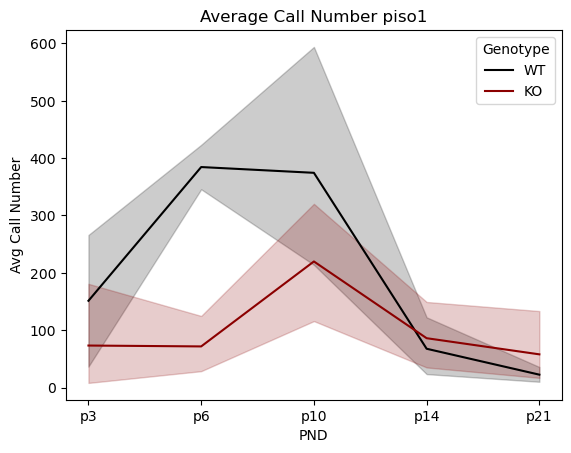

In [101]:
# graph male genotype differences in average call number
colors = ["#000000","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_g.loc[pup_df_g['Timepoint'] == 'iso1']
sns.lineplot(iso1_callnum,x='PND',y='File',hue='Genotype')


plt.ylabel('Avg Call Number')

plt.title('Average Call Number piso1')   


Text(0.5, 1.0, 'Average Call Number iso1')

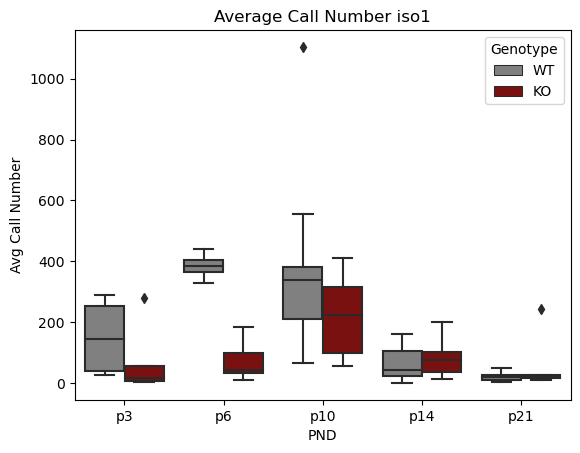

In [100]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_g.loc[pup_df_g['Timepoint'] == 'iso1']
sns.boxplot(iso1_callnum,x='PND',y='File',hue='Genotype')


plt.ylabel('Avg Call Number')

plt.title('Average Call Number iso1')   

Text(0.5, 1.0, 'Average Call Number iso2')

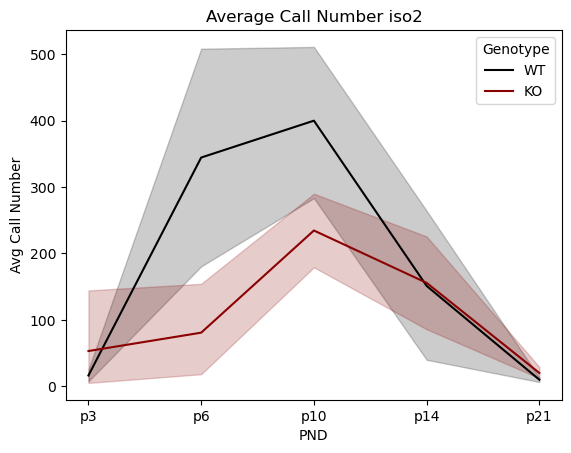

In [99]:
colors = ["#000000","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_g.loc[pup_df_g['Timepoint'] == 'iso2']
sns.lineplot(iso1_callnum,x='PND',y='File',hue='Genotype')


plt.ylabel('Avg Call Number')

plt.title('Average Call Number iso2')   

Text(0.5, 1.0, 'Average Call Number iso2')

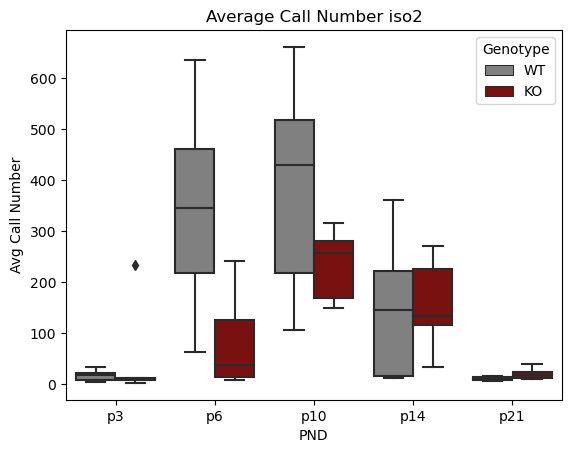

In [98]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_g.loc[pup_df_g['Timepoint'] == 'iso2']
sns.boxplot(iso1_callnum,x='PND',y='File',hue='Genotype')


plt.ylabel('Avg Call Number')

plt.title('Average Call Number iso2')  

# Duration Comparison

Text(0.5, 1.0, 'Average Call Duration iso1')

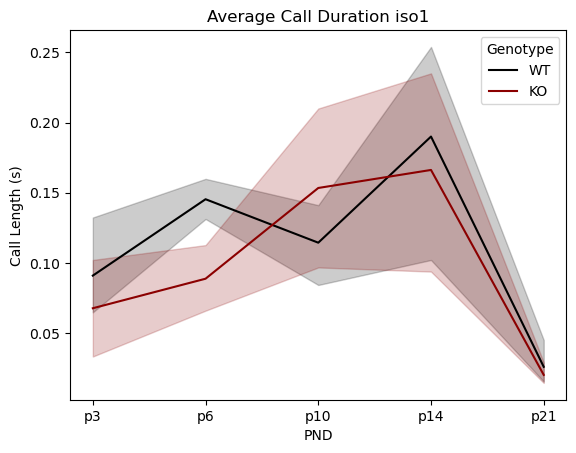

In [96]:

colors = ["#000000","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.lineplot(iso1_callnum,x='PND',y='Call Length (s)',hue='Genotype')



plt.title('Average Call Duration iso1')    

Text(0.5, 1.0, 'Average Call Duration iso1')

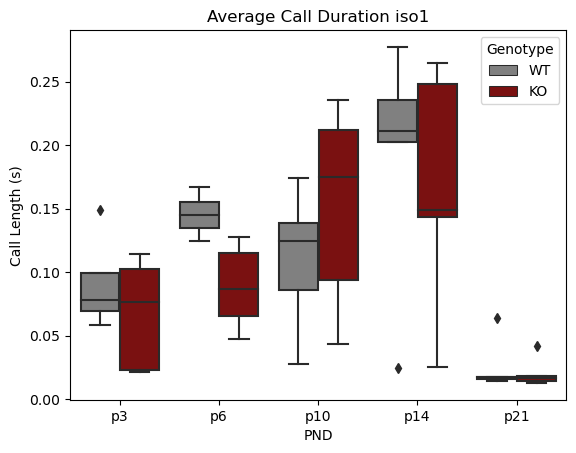

In [95]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.boxplot(iso1_callnum,x='PND',y='Call Length (s)',hue='Genotype')


plt.title('Average Call Duration iso1')   

Text(0.5, 1.0, 'Average Call Duration iso2')

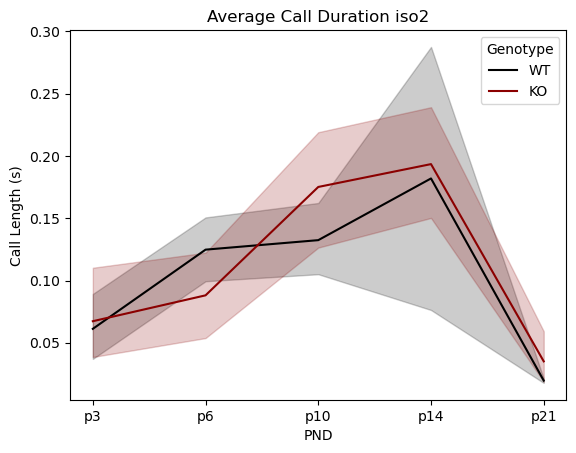

In [94]:
colors = ["#000000","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.lineplot(iso2_callnum,x='PND',y='Call Length (s)',hue='Genotype')



plt.title('Average Call Duration iso2')    

Text(0.5, 1.0, 'Average Call Duration iso2')

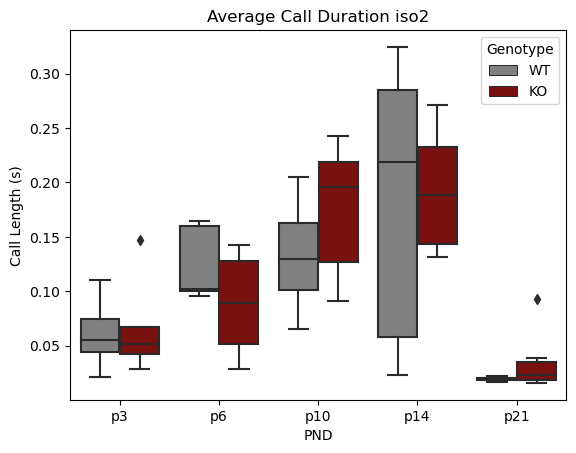

In [93]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.boxplot(iso2_callnum,x='PND',y='Call Length (s)',hue='Genotype')



plt.title('Average Call Duration iso2')   

# Principal Freq

Text(0.5, 1.0, 'Avg Principal Frequency iso1')

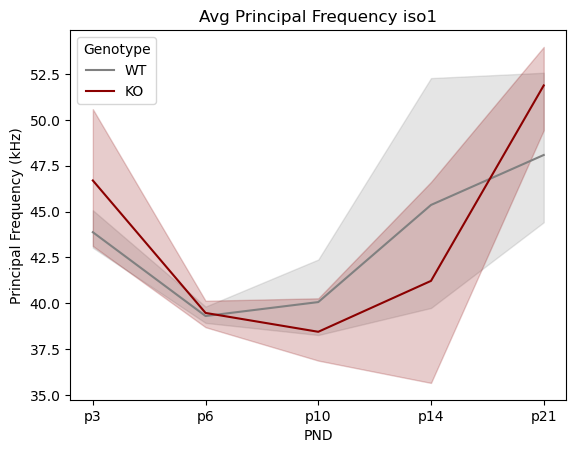

In [106]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.lineplot(iso1_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')



plt.title('Avg Principal Frequency iso1')    

Text(0.5, 1.0, 'Avg Principal Frequency iso1')

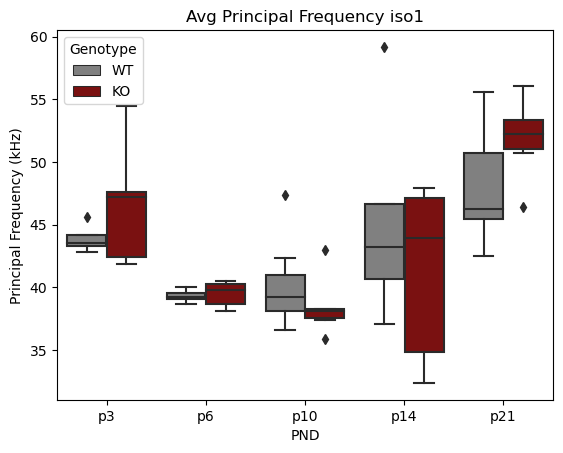

In [91]:
colors = ["#808080","#8b0000"]
sns.set_palette(sns.color_palette(colors))
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.boxplot(iso2_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')



plt.title('Avg Principal Frequency iso1') 

Text(0.5, 1.0, 'Avg Principal Frequency iso2')

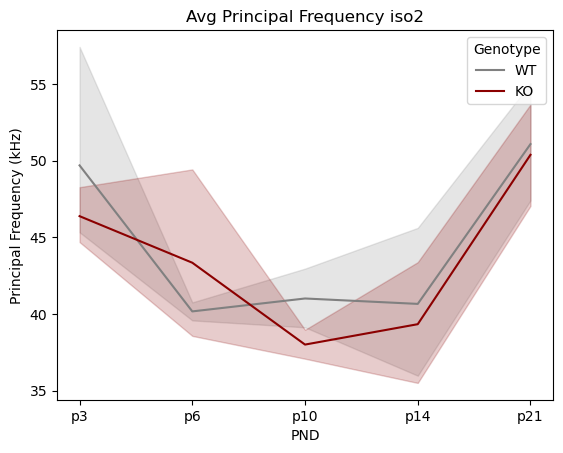

In [90]:
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.lineplot(iso1_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')



plt.title('Avg Principal Frequency iso2') 






Text(0.5, 1.0, 'Avg Principal Frequency iso2')

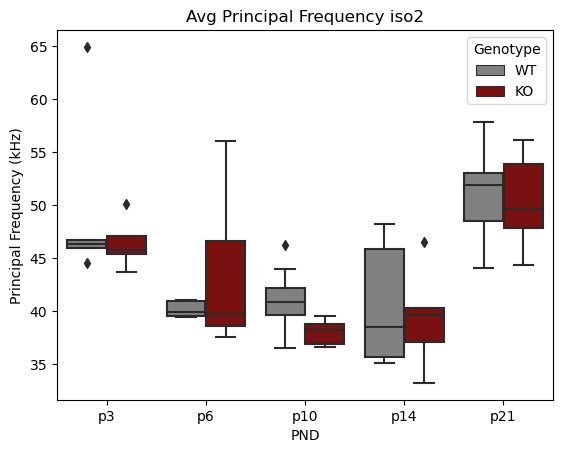

In [89]:
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.boxplot(iso2_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')



plt.title('Avg Principal Frequency iso2') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope iso1')

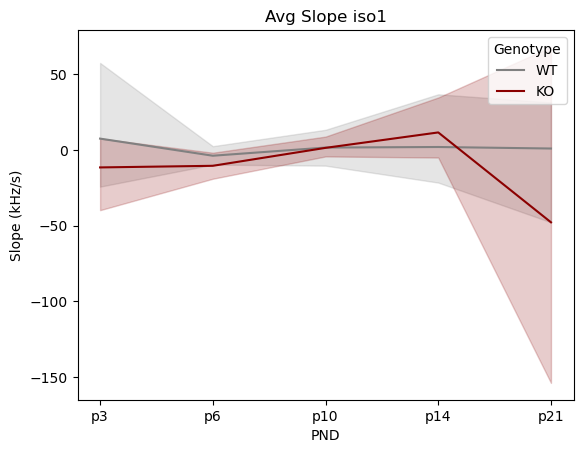

In [84]:
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.lineplot(iso1_callnum,x='PND',y='Slope (kHz/s)',hue='Genotype')




plt.title('Avg Slope iso1') 




Text(0.5, 1.0, 'Avg Slope iso1')

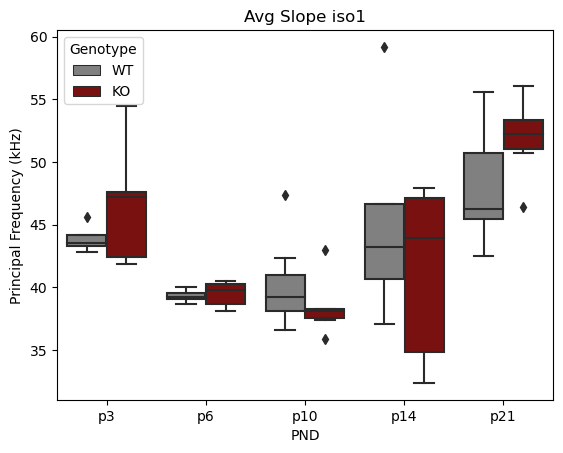

In [85]:
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso1']
sns.boxplot(iso2_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')


plt.title('Avg Slope iso1') 

Text(0.5, 1.0, 'Avg Slope iso2')

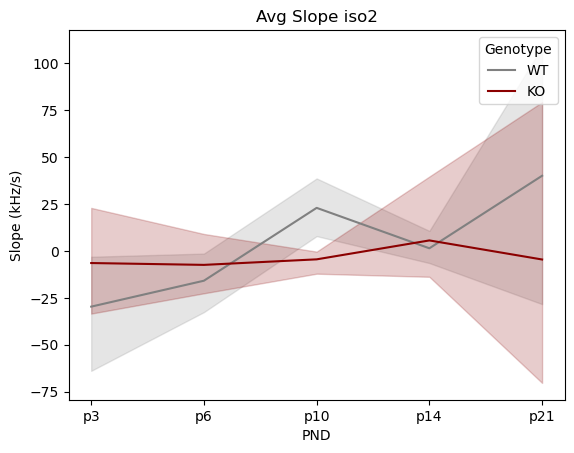

In [88]:
sns.set_palette(sns.color_palette(colors))
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.lineplot(iso1_callnum,x='PND',y='Slope (kHz/s)',hue='Genotype')




plt.title('Avg Slope iso2') 

Text(0.5, 1.0, 'Avg Slope iso2')

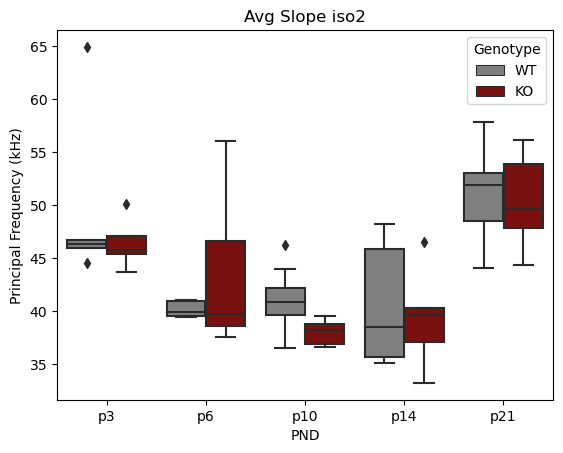

In [86]:
iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == 'iso2']
sns.boxplot(iso2_callnum,x='PND',y='Principal Frequency (kHz)',hue='Genotype')


plt.title('Avg Slope iso2') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Freq (kHz) iso1')

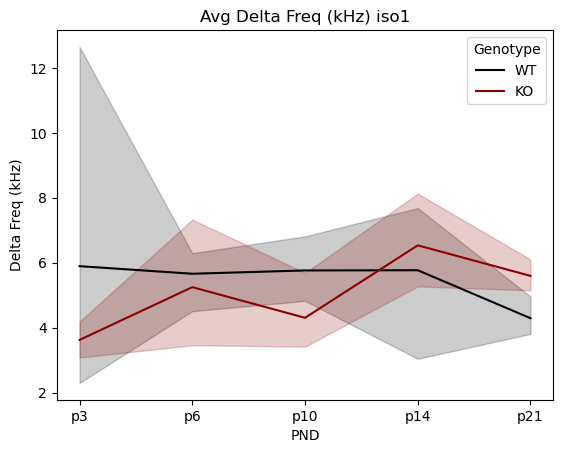

In [103]:
iso_num = 'iso1'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Delta Freq (kHz)',hue='Genotype')

plt.title('Avg Delta Freq (kHz) '+iso_num) 

Text(0.5, 1.0, 'Avg Delta Freq (kHz) iso1')

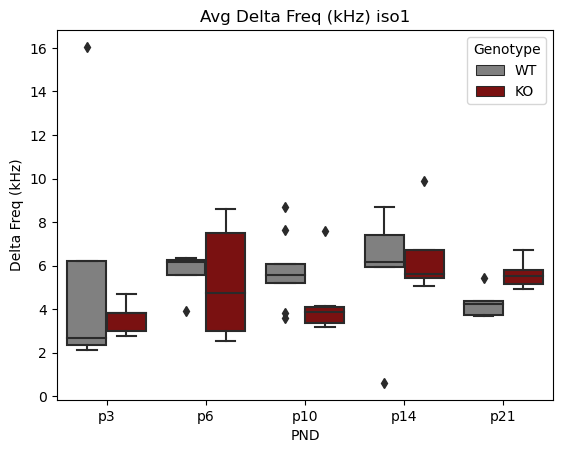

In [108]:
iso_num = 'iso1'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Delta Freq (kHz)',hue='Genotype')


plt.title('Avg Delta Freq (kHz) ' + iso_num) 

Text(0.5, 1.0, 'Avg Delta Freq (kHz) iso2')

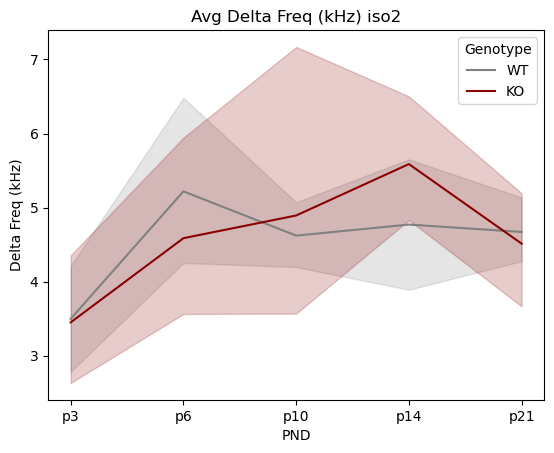

In [109]:
iso_num = 'iso2'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Delta Freq (kHz)',hue='Genotype')

plt.title('Avg Delta Freq (kHz) '+iso_num) 

Text(0.5, 1.0, 'Avg Delta Freq (kHz) iso2')

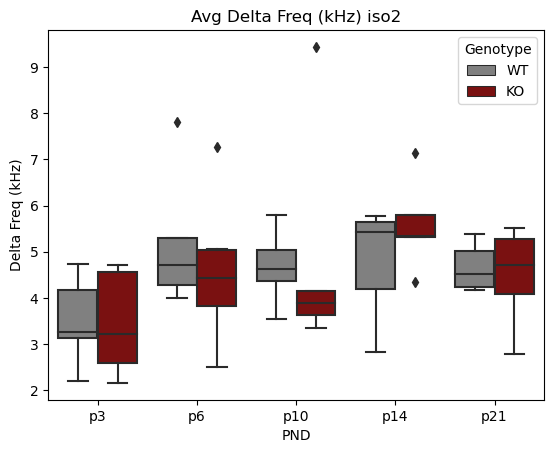

In [110]:
iso_num = 'iso2'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Delta Freq (kHz)',hue='Genotype')


plt.title('Avg Delta Freq (kHz) ' + iso_num) 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity iso1')

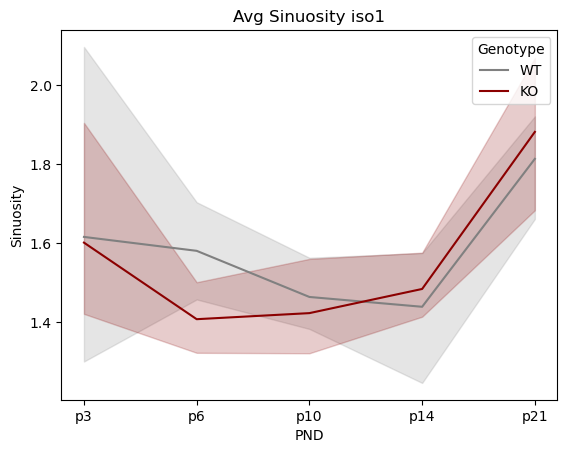

In [111]:
iso_num = 'iso1'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Sinuosity',hue='Genotype')

plt.title('Avg Sinuosity '+iso_num) 

Text(0.5, 1.0, 'Avg Sinuosity iso1')

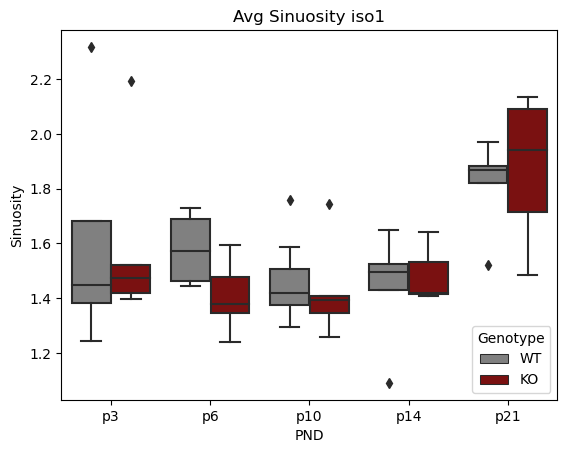

In [112]:
iso_num = 'iso1'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Sinuosity',hue='Genotype')


plt.title('Avg Sinuosity ' + iso_num) 

Text(0.5, 1.0, 'Avg Sinuosity iso2')

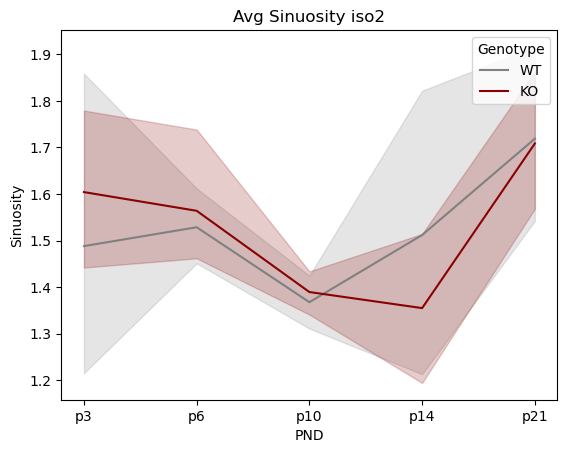

In [113]:
iso_num = 'iso2'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Sinuosity',hue='Genotype')

plt.title('Avg Sinuosity '+iso_num)

Text(0.5, 1.0, 'Avg Sinuosity iso2')

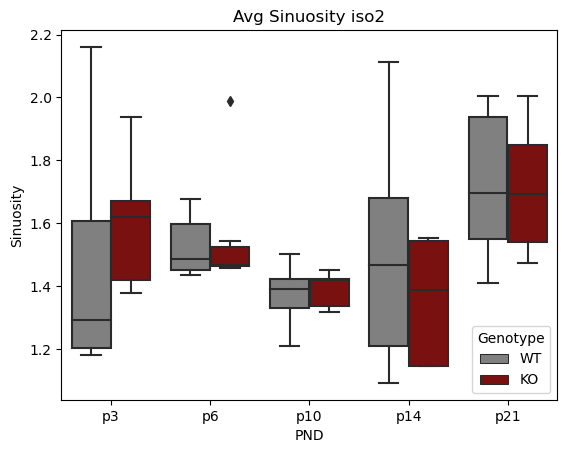

In [114]:
iso_num = 'iso2'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Sinuosity',hue='Genotype')


plt.title('Avg Sinuosity ' + iso_num) 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz) iso1')

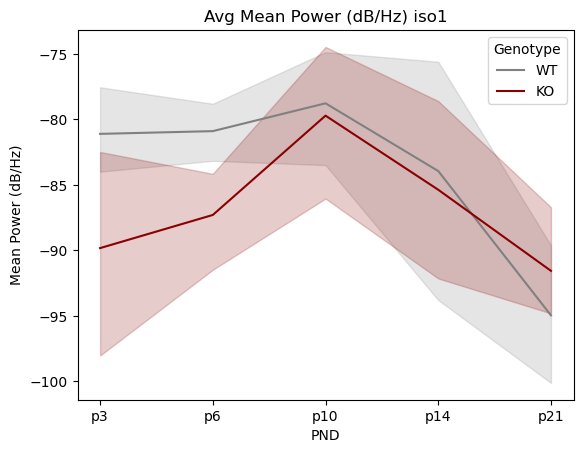

In [116]:
iso_num = 'iso1'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Mean Power (dB/Hz)',hue='Genotype')

plt.title('Avg Mean Power (dB/Hz) '+iso_num) 

Text(0.5, 1.0, 'Avg Mean Power (dB/Hz) iso1')

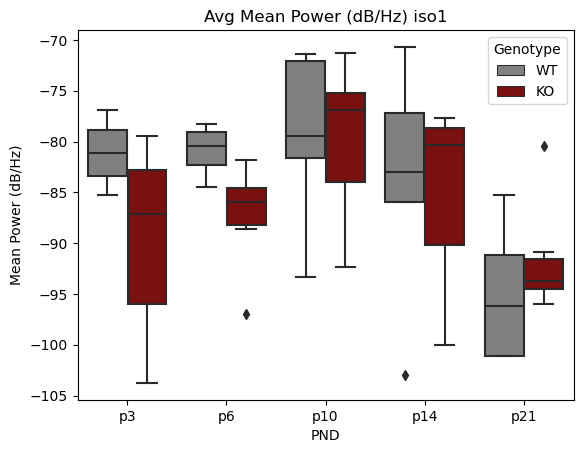

In [117]:
iso_num = 'iso1'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Mean Power (dB/Hz)',hue='Genotype')


plt.title('Avg Mean Power (dB/Hz) ' + iso_num) 

Text(0.5, 1.0, 'Avg Mean Power (dB/Hz) iso2')

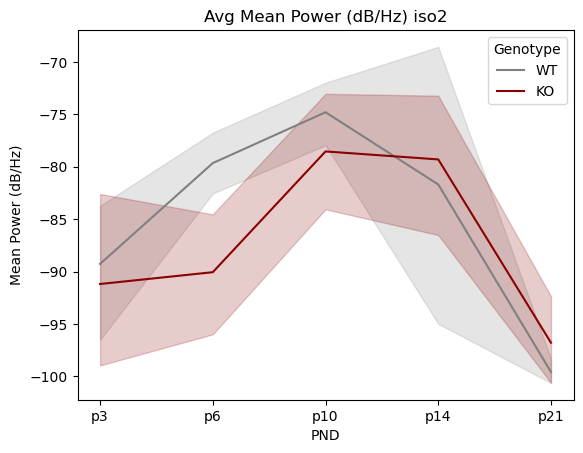

In [118]:
iso_num = 'iso2'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Mean Power (dB/Hz)',hue='Genotype')

plt.title('Avg Mean Power (dB/Hz) '+iso_num)

Text(0.5, 1.0, 'Avg Mean Power (dB/Hz) iso2')

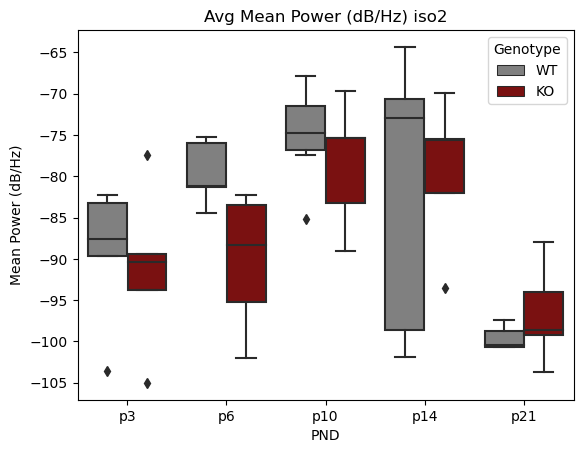

In [119]:
iso_num = 'iso2'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Mean Power (dB/Hz)',hue='Genotype')


plt.title('Avg Mean Power (dB/Hz) ' + iso_num) 

# Tonality

Text(0.5, 1.0, 'Avg Tonality iso1')

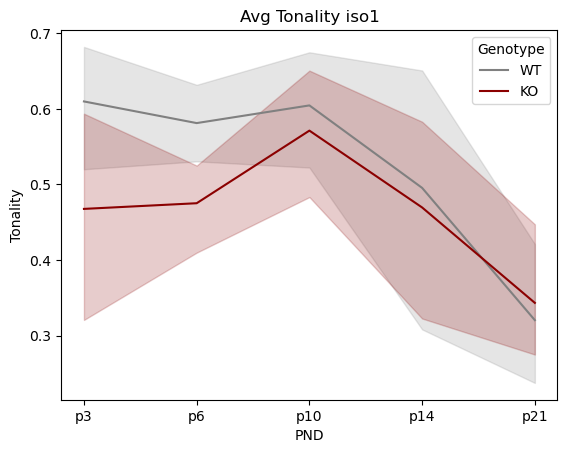

In [120]:
iso_num = 'iso1'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Tonality',hue='Genotype')

plt.title('Avg Tonality '+iso_num) 

Text(0.5, 1.0, 'Avg Tonality iso1')

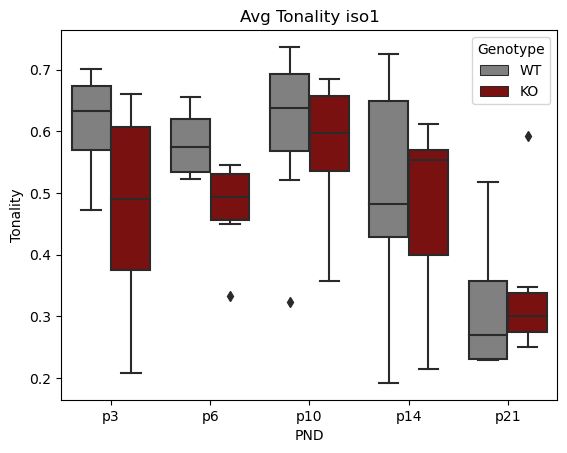

In [121]:
iso_num = 'iso1'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Tonality',hue='Genotype')


plt.title('Avg Tonality ' + iso_num) 

Text(0.5, 1.0, 'Avg Tonality iso2')

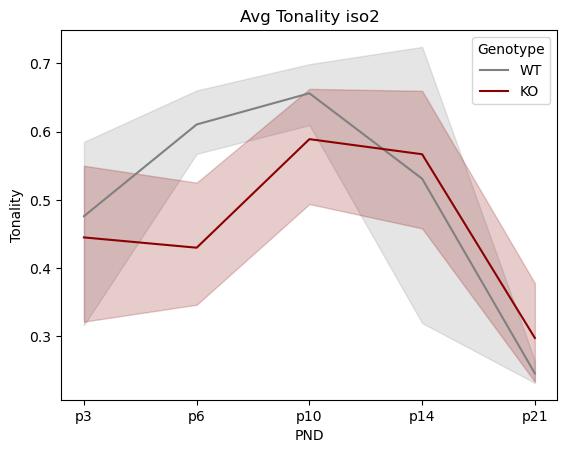

In [122]:
iso_num = 'iso2'
iso1_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.lineplot(iso1_callnum,x='PND',y='Tonality',hue='Genotype')

plt.title('Avg Tonality '+iso_num)

Text(0.5, 1.0, 'Avg Tonality iso2')

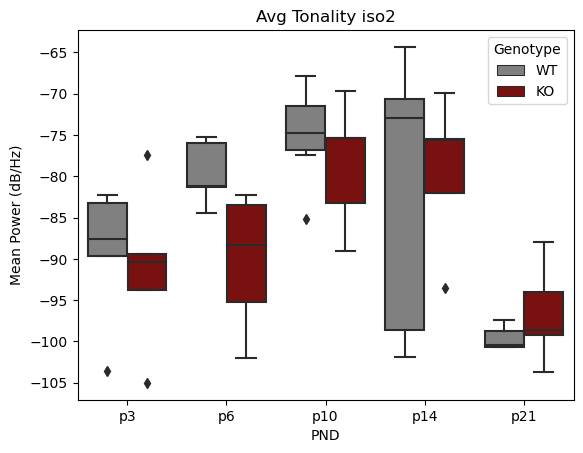

In [123]:
iso_num = 'iso2'
sns.set_palette(sns.color_palette(colors))

iso2_callnum = pup_df_rat_avg.loc[pup_df_rat_avg['Timepoint'] == iso_num]
sns.boxplot(iso2_callnum,x='PND',y='Mean Power (dB/Hz)',hue='Genotype')


plt.title('Avg Tonality ' + iso_num) 

# Call Type Comparison

In [138]:
def compute_proportion(group, target_string):
    total_count = len(group)
    if total_count == 0:
        return 0
    else:
        return group.str.count(target_string).sum() / total_count

# Define the target string
target_string = 'Downward_Ramp'

# Group by 'group' column and apply the counting function
counts = pup_df.groupby(['Rat','PND','Genotype'])['Label'].apply(compute_proportion, target_string=target_string)

counts = counts.reset_index()


In [139]:
counts

,Rat,PND,Genotype,Label
0,563,p14,WT,0.000000
1,563,p21,WT,0.000000
2,563,p3,WT,0.073955
3,563,p6,WT,0.129032
4,564,p14,KO,0.030418
5,564,p21,KO,0.000000
6,564,p3,KO,0.166667
7,564,p6,KO,0.090909
8,565,p14,KO,0.026316
9,565,p21,KO,0.103448


<Axes: xlabel='PND', ylabel='Label'>

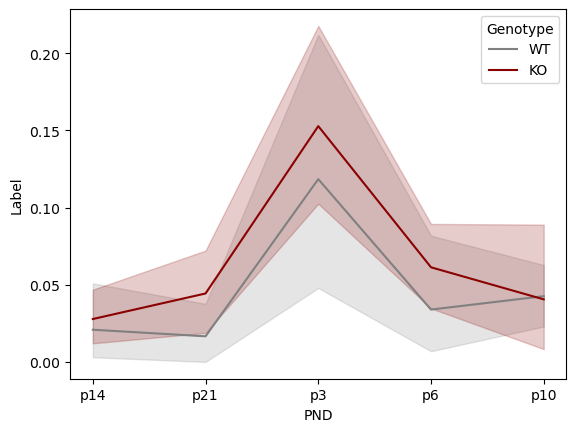

In [140]:
sns.lineplot(counts,x='PND',y='Label',hue='Genotype')

In [24]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,1,Flat,True,0.663786,0.066253,0.118018,0.051765,39.141329,38.375563,...,1.531532,0.283794,0.881980,1.020711,-81.251688,0.497346,39.141329,WT,iso1,1.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,2,Usv,True,0.785730,0.261688,0.308859,0.047171,38.799453,38.227062,...,1.717172,0.442956,6.590278,1.200113,-80.913806,0.691142,38.799453,WT,iso1,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,3,Flat,True,0.686565,3.625242,3.668206,0.042965,38.234797,37.979542,...,0.510511,0.150541,2.583063,1.093011,-85.867773,0.619020,38.490053,WT,iso1,1.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,4,Flat,True,0.712170,3.797822,3.889587,0.091765,39.853491,39.429551,...,2.331671,0.647557,-15.761049,1.182894,-73.310345,0.786215,40.913342,WT,iso1,1.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p6\...,5,Flat,True,0.717449,3.994546,4.184364,0.189818,39.930425,39.609670,...,2.405660,0.570155,0.781058,1.437578,-74.431837,0.759753,40.411557,WT,iso1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,58,Downward_Ramp,True,0.628594,168.695315,168.742667,0.047353,35.707237,34.391447,...,1.842105,0.565287,-19.030371,1.214420,-90.536272,0.501961,35.970395,WT,iso2,3.0
58,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,59,Usv,True,0.740898,169.049209,169.077162,0.027953,37.809343,36.950758,...,0.858586,0.433651,-33.849628,1.051777,-90.348330,0.326402,37.809343,WT,iso2,3.0
59,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,60,Flat,True,0.708760,169.244826,169.284632,0.039806,36.354167,35.520833,...,26.666667,4.072048,-274.152711,1.148535,-91.612879,0.297437,36.354167,WT,iso2,3.0
60,D:\Rat Pup call analysis\litter le15 fmr1\p6\r...,61,Flat,True,0.846622,181.583454,181.647384,0.063929,41.035839,39.549825,...,3.566434,0.829051,23.494932,1.544368,-71.782035,0.775932,41.333042,WT,iso2,4.0


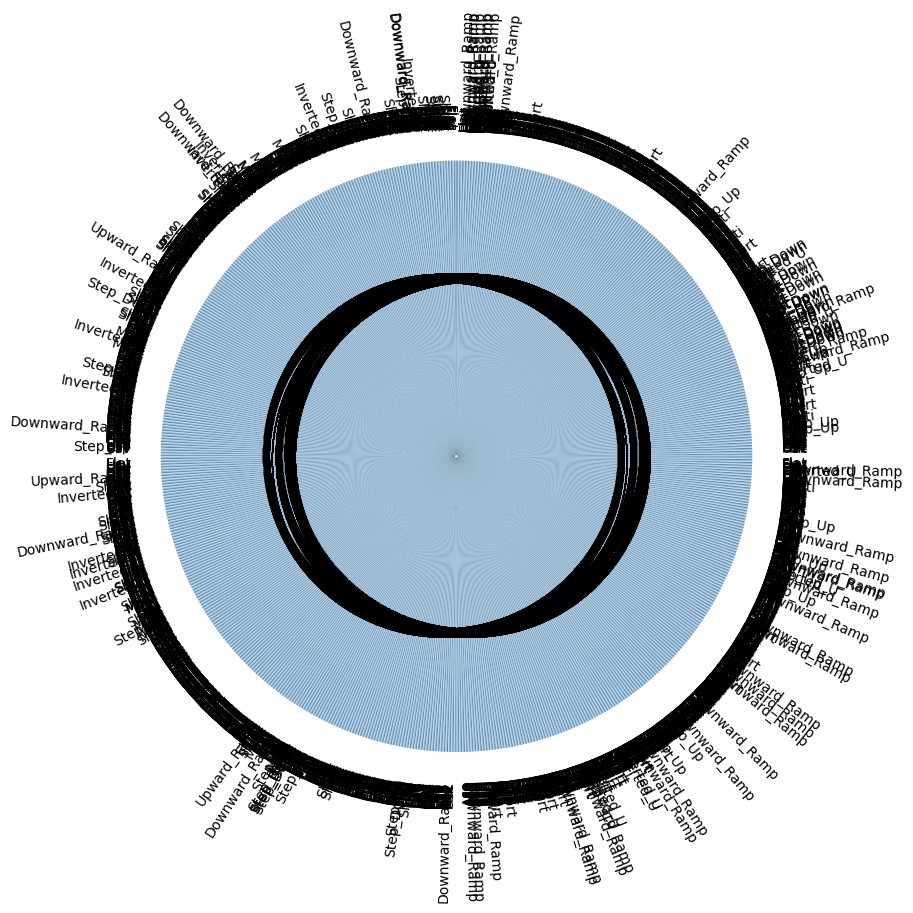

In [25]:
# WT pie chart

wtdata = wt_flat_df['Accepted']
wtdata = np.array(wtdata)
wtlabel = wt_flat_df['Label']
wtlabel = np.array(wtlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(wtdata, labels = wtlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()


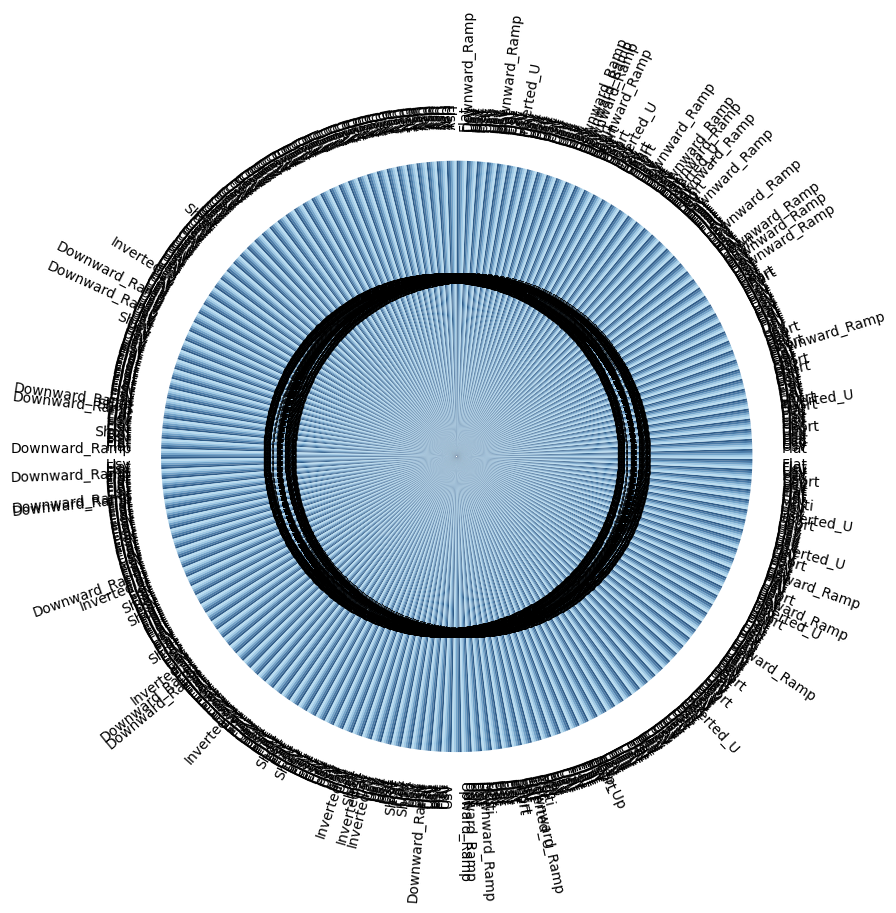

In [26]:
# het pie chart
hetdata = KO_flat_df['Accepted']
hetdata = np.array(hetdata)
hetlabel = KO_flat_df['Label']
hetlabel = np.array(hetlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(hetdata, labels = hetlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()